<a href="https://colab.research.google.com/github/tutalae/Titanic-machine-learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Loading Data
titanic = pd.read_csv("https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv", index_col = 'PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean Continuous variables

In [6]:
# Fill missing for age
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace = True)
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


In [8]:
# Combine SibSp & Parch

<Figure size 432x288 with 0 Axes>

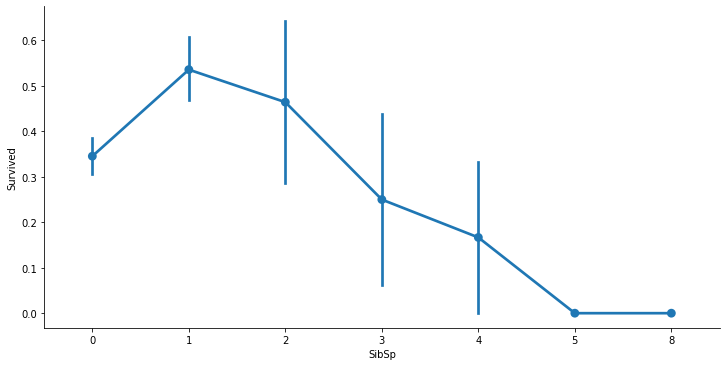

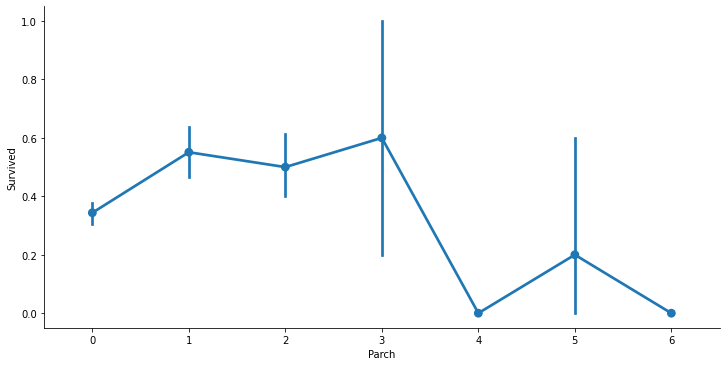

In [9]:
for i, col in enumerate(["SibSp", "Parch"]):
      plt.figure(i)
      sns.catplot(x = col, y = "Survived", data = titanic, kind = "point", aspect = 2, )


In [10]:
titanic["Family_cnt"] = titanic["SibSp"] + titanic["Parch"]

In [11]:
# Drop unnecessary variables

In [12]:
titanic.drop(["SibSp", "Parch"], axis = 1, inplace= True)

In [13]:
titanic.reset_index(drop=True, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [14]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [15]:
titanic.groupby(titanic["Cabin"].isnull())["Survived"].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [16]:
titanic["Cabin_ind"] = np.where(titanic["Cabin"].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [17]:
# convert Sex to numeric

In [18]:
gender_num = {"male": 0 , "female" : 1}
titanic["Sex"] = titanic["Sex"].map(gender_num)
titanic.head()


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [19]:
# Drop unnecessary variables
titanic.drop(["Cabin", "Embarked", "Name", "Ticket"], axis= 1, inplace= True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [20]:
#Write out cleaned data
titanic.to_csv("../../../titanic_cleaned.csv", index = False)

In [21]:
titanic_cleaned = titanic.copy()
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
features = titanic.drop("Survived", axis = 1)
labels = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [24]:
for dataset in [y_train, y_val, y_test]:
  print(round(len(dataset)/len(labels), 2))

0.6
0.2
0.2


In [25]:
# write out data
"""
X_train.to_csv("train_features.csv", index= False)
X_val.to_csv("val_features.csv")
X_test.to_csv("test_features.csv")

y_train.to_csv("train_labels.csv")
y_val.to_csv("val_labels.csv")
y_test.to_csv("test_labels.csv")
"""

'\nX_train.to_csv("train_features.csv", index= False)\nX_val.to_csv("val_features.csv")\nX_test.to_csv("test_features.csv")\n\ny_train.to_csv("train_labels.csv")\ny_val.to_csv("val_labels.csv")\ny_test.to_csv("test_labels.csv")\n'

In [26]:
# Regression
from sklearn.linear_model import LogisticRegression

LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
dir(LogisticRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

In [28]:
import joblib
from sklearn.model_selection import  GridSearchCV
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [29]:
def print_results(results):
  print("BEST PARAMS: {} \n".format(results.best_params_))
  
  means = results.cv_results_["mean_test_score"]
  stds = results.cv_results_["std_test_score"]
  for mean, std, params in zip (means, stds, results.cv_results_["params"]):
    print("{} (+/- {}) for {}".format(round(mean, 3), round(std * 2, 3), params))

In [30]:
lr = LogisticRegression()
parameters = {
    "C": [ 0.001, 0.01, 0.1, 1, 100, 1000 ]
}

cv = GridSearchCV(lr, parameters, cv = 5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


BEST PARAMS: {'C': 1} 

0.67 (+/- 0.077) for {'C': 0.001}
0.708 (+/- 0.098) for {'C': 0.01}
0.777 (+/- 0.134) for {'C': 0.1}
0.8 (+/- 0.118) for {'C': 1}
0.794 (+/- 0.116) for {'C': 100}
0.794 (+/- 0.116) for {'C': 1000}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [31]:
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# write out pickled model
joblib.dump(cv.best_estimator_, "../../../LR_model.pkl")

['../../../LR_model.pkl']

In [33]:
#SVM
from sklearn.svm import  SVC

SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
from sklearn.svm import SVC

In [35]:
tr_features = X_train
tr_labels = y_train

In [38]:
svc = SVC( )
parameters = {
    "kernel" : ["linear", "rbf"],
    "C" : [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv= 5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'} 

0.796 (+/- 0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/- 0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/- 0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/- 0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/- 0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/- 0.07) for {'C': 10, 'kernel': 'rbf'}


In [39]:
cv.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)